# PART I - Fully Connected Neural Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Wine dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Book Genre Classification data. You will be performing a genre classification of books into 32 categories.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the book genre classification cell. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [1]:
import numpy as np
from blg561e.layer import layer
from blg561e.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

### To auto-reload your modules from the *.py files, re run the following cell

In [2]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [3]:
num_inputs = 10
input_shape = (4, 7, 2)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])

relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


#### Backward pass : 
Go under blg561e/layer.py and find AffineLayer class. Implement the backward pass for Affine layer.

In [4]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  7.882509889959262e-10
dw error:  1.3592685518020832e-10
db error:  1.8477112902497496e-10


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [5]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [6]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)

# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  3.2756263483625388e-12


### c. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 
*** Implement your loss computation in the function "loss" of the layer.py ***

The L2 regularizer will be added by you in the Optimization phase later.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [7]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)
softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = layer.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302478992941877
dx error:  9.563859596159055e-09


### d. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivative. Do not forget to use your activation in training part with the Wine data to show that it works and makes sense. You can also plot your activation for litte extra credits.

#### Swish Activation Function
I implemented the "Swish" activation function because of its superior characteristics compared to ReLU.

Reference to the paper: https://arxiv.org/pdf/1710.05941v1.pdf


Swish is defined as $f(x)=x\cdot\sigma(\beta x)$, where $\sigma(z) = (1 + \exp(-z))^{-1}$ and $\beta$ is either a constant or a trainable parameter. Please note that my implementation of the Swish activation function takes the constant $\beta=1$.

The derivative of Swish is $f^\prime(x) = \beta f(x) + \sigma(\beta x)(1 - \beta f(x))$

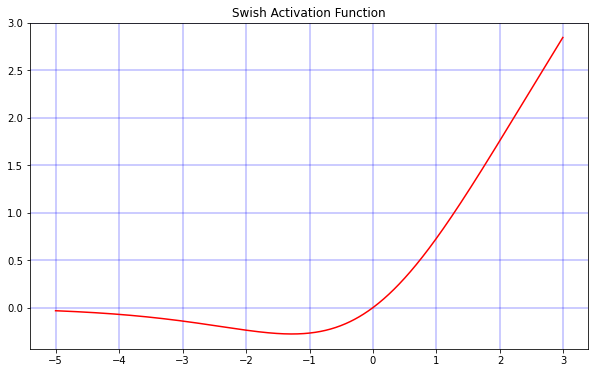

In [8]:
x = np.arange(-5, 3, 0.01)
my_layer = layer.YourActivation()
y = my_layer.forward(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color="r")
plt.title("Swish Activation Function")
plt.grid(lw="2", color="b", alpha=0.2)

In [9]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  4.5549818399597506e-10


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization to both optimizers.**

In [10]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSDGOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]


In [11]:
student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


In [12]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]

In [13]:
student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known Wine dataset (https://archive.ics.uci.edu/ml/datasets/wine). Each instance has 13 features as the chemical analysis of wines and you will classify the data where the class number is 3 and each class represents different origin of wines.

In [14]:
from sklearn import preprocessing
from sklearn.datasets import load_wine  # Load dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) # Before training, understand your data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
X, y = data.data, data.target # Get the features and the corresponding classes
model = layer.Model() # Create a model instance
 
# Wine dataset has 13 features, so the input size of first layer is 13. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
# layers = [layer.AffineLayer(13,64), layer.ReLU(), layer.AffineLayer(64,3), layer.Softmax()]
layers = [layer.AffineLayer(13,64), layer.YourActivation(), layer.AffineLayer(64,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(178) # Number of instances in the Wine data is 178
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0
n_epochs = 1200
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-1, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()
    
    if epoch % test_every == 0:
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        test_losses.append(loss)
        test_accs.append([test_acc for i in range(test_every)])
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 0.9268322156480049, Accuracy: 0.6549295774647887
Epoch: 0, Test Loss: 0.669759104244352, Test Accuracy: 0.6388888888888888
Epoch: 50, Loss: 0.15893801026210758, Accuracy: 0.9647887323943662
Epoch: 100, Loss: 0.06243627389454511, Accuracy: 0.9859154929577465
Epoch: 150, Loss: 0.031405981023902914, Accuracy: 0.9929577464788732
Epoch: 200, Loss: 0.019396751586098705, Accuracy: 1.0
Epoch: 200, Test Loss: 0.01359273675895549, Test Accuracy: 1.0
Epoch: 250, Loss: 0.013431113852523173, Accuracy: 1.0
Epoch: 300, Loss: 0.009864869029642207, Accuracy: 1.0
Epoch: 350, Loss: 0.00760604214220114, Accuracy: 1.0
Epoch: 400, Loss: 0.006109511822967744, Accuracy: 1.0
Epoch: 400, Test Loss: 0.005464865494074118, Test Accuracy: 1.0
Epoch: 450, Loss: 0.005068217486561236, Accuracy: 1.0
Epoch: 500, Loss: 0.00431013424012385, Accuracy: 1.0
Epoch: 550, Loss: 0.003736919147552721, Accuracy: 1.0
Epoch: 600, Loss: 0.0032899208244392252, Accuracy: 1.0
Epoch: 600, Test Loss: 0.004195348686465442, 

### g. Plot the training and test loss curves for diagnostics below:

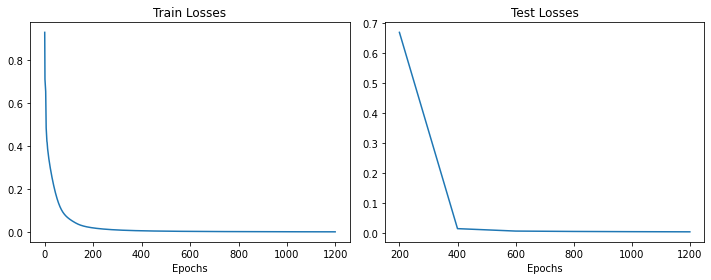

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(train_losses)
axes[1].plot(np.arange(test_every, epoch + test_every, test_every), test_losses)
axes[0].set_title("Train Losses")
axes[1].set_title("Test Losses")
for axis in axes:
    axis.set_xlabel("Epochs")
fig.tight_layout()

# PART II - Book Genre Classification

Now, in this part, you will work with text data (https://arxiv.org/pdf/1610.09204.pdf) for book genre analysis. Originally, the dataset is used for book genre classification by the book cover image. In this part, you will classify the books into their genres by their titles. The total number of genres for the books to be classified into is 32.

Below, we already implemented the preprocessing codes fro the data. Run the below cells and load the text data "book32-listing.csv" into an appropriate form. You will need to use batch-wise optimizer since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [17]:
# Read csv into a data frame
csv = 'book32-listing.csv'
all_data = pd.read_csv(csv, encoding = 'ISO-8859-1', index_col=0)
all_data.head()

,Image,Image_link,Title,Author,Class,Genre
Id,,,,,,
761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [18]:
# As we only care about the Title, Author and Class columns, we will extract them and shuffle the data
# We can enrich the feature representation by including the Author information
from sklearn.utils import shuffle
data = all_data[['Title', 'Author', 'Class']]
data['Text'] = data['Title'].astype(str) + ' ' + data['Author'].astype(str)
data = data[['Text', 'Class']]
data = shuffle(data, random_state=42)
data.head()

/home/batuhanfaik/anaconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Text,Class
Id,,
471839655,Fundamentals of Photonics (Wiley Series in Pur...,23
1604691956,50 Beautiful Deer-Resistant Plants: The Pretti...,8
62237330,Eric: A Novel of Discworld Terry Pratchett,24
472051849,"The North Country Trail: The Best Walks, Hikes...",29
806983590,"The Rug Hook Book: Techniques, Projects And Pa...",8


In [19]:
# Now, we will use some very basic text cleaning steps 
import nltk
import re
# nltk.download('stopwords') # After you download the data, you can comment this line 

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) # Stopwords carry far less meaning than other keywords in the text

def clean_text(text):
    # Remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # Remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # Remove whitespaces 
    text = ' '.join(text.split()) 
    # Convert text to lowercase 
    text = text.lower()
    # Remove stopwords
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    
    return ' '.join(no_stopword_text)

data['Text'] = data['Text'].apply(lambda x: clean_text(x))
data.head()

,Text,Class
Id,,
471839655,fundamentals photonics wiley series pure appli...,23
1604691956,beautiful deer resistant plants prettiest annu...,8
62237330,eric novel discworld terry pratchett,24
472051849,north country trail best walks hikes backpacki...,29
806983590,rug hook book techniques projects patterns eas...,8


In [20]:
# We will extract features from the text and split the data into training, validation and test sets

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500) 
# You can change the max_features if you encounter a memory error, but do not make it too small

x_train_series, y_train = data['Text'][:150000], data['Class'][:150000] # 150K train
x_val_series, y_val = data['Text'][150000:180000], data['Class'][150000:180000] # 30K val
x_test_series, y_test = data['Text'][180000:], data['Class'][180000:] # ~30K test

x_train = np.array(vectorizer.fit_transform(x_train_series).todense())
x_val = np.array(vectorizer.transform(x_val_series).todense())
x_test = np.array(vectorizer.transform(x_test_series).todense())

### a. You will use your implementations (layers.py) below to carry out the book genre classification. Construct your model with all its layers in the cell below.

In [21]:
num_features = x_train.shape[-1]
num_data_points = len(data["Text"])
num_classes = len(np.unique(y_train))    # Number of classes is predetermined via the dataset, however we can obtain it by analyzing the data
book_model = layer.Model()
layers = [
    layer.AffineLayer(num_features, 1024),
    layer.YourActivation(),
    layer.AffineLayer(1024, num_classes),
    layer.Softmax()]
book_model(layers)

train_accs = []
val_accs = []
train_losses = []
val_losses = []

# Options
shuffle_on_each_epoch = True
mini_batch_size = 512
regularization_strength = 0
momentum = 0.9
n_epochs = 10
print_every = 1
val_every = 2

predictions = np.ones(mini_batch_size)
optimizer = layer.SGDWithMomentum(book_model, lr=1e-1, regularization_str=regularization_strength, mu=momentum)

# def batch_norm(x, eps=np.finfo(float).eps):
#     mean = np.mean(x, axis=0)
#     variance = np.var(x, axis=0)
#     normalized_x = (x - mean) / np.sqrt(variance + eps)
#     return normalized_x

with np.errstate(divide='ignore'):    # Ignore the divide by zero error
    print("Training Started!")
    for epoch in range(n_epochs):
        if shuffle_on_each_epoch:
            x_train, y_train = create_permutation(x_train, y_train)
            
        for iteration in range((num_data_points + mini_batch_size - 1) // mini_batch_size):
            x_train_ = x_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]
            y_train_ = y_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]

            if len(x_train_) == 0:
                break
            
            softmax_out = book_model.forward(x_train_)

            predictions = np.argmax(softmax_out, axis=1)
            train_acc = np.mean(predictions == y_train_)
            loss = layer.loss(softmax_out, y_train_)

            train_accs.append(train_acc)
            train_losses.append(loss)

            book_model.backward(y_train_)
            optimizer.optimize()
            
            if iteration % 200 == 199:
                print("Iteration: {}, Loss: {}, Accuracy: {}".format(iteration + 1, loss, train_acc))

        if epoch % print_every == print_every - 1:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch + 1, loss, train_acc))

        if epoch % val_every == val_every - 1:
            softmax_out = book_model.forward(x_val)
            predictions = np.argmax(softmax_out, axis=1)
            loss = layer.loss(softmax_out, y_val)
            val_acc = np.mean(predictions == y_val)
            val_losses.append(loss)
            val_accs.append([val_acc for i in range(val_every)])
            print("Epoch: {}, Val Loss: {}, Val Accuracy: {}".format(epoch + 1, loss, val_acc))
    print("Training Ends!\n")
            
    # Test the model
    softmax_out = book_model.forward(x_test)
    predictions = np.argmax(softmax_out, axis=1)
    loss = layer.loss(softmax_out, y_test)
    test_acc = np.mean(predictions == y_test)
    print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))

Training Started!
Iteration: 200, Loss: 2.631581956388958, Accuracy: 0.365234375
Epoch: 1, Loss: 2.466911696997429, Accuracy: 0.40725806451612906
Iteration: 200, Loss: 2.113967281377818, Accuracy: 0.443359375
Epoch: 2, Loss: 2.205189392956449, Accuracy: 0.4153225806451613
Epoch: 2, Val Loss: 2.0900317526199865, Val Accuracy: 0.45916666666666667
Iteration: 200, Loss: 1.9068218082835808, Accuracy: 0.484375
Epoch: 3, Loss: 1.8874196690386342, Accuracy: 0.5141129032258065
Iteration: 200, Loss: 1.9048526419967642, Accuracy: 0.48046875
Epoch: 4, Loss: 1.8696617652508494, Accuracy: 0.5080645161290323
Epoch: 4, Val Loss: 1.932566706615186, Val Accuracy: 0.48456666666666665
Iteration: 200, Loss: 1.830636818050104, Accuracy: 0.484375
Epoch: 5, Loss: 1.847363161629669, Accuracy: 0.4959677419354839
Iteration: 200, Loss: 1.6578073113152052, Accuracy: 0.53515625
Epoch: 6, Loss: 1.6792928391252768, Accuracy: 0.530241935483871
Epoch: 6, Val Loss: 1.8609643688430995, Val Accuracy: 0.5001666666666666
It

### b. Plot histogram of the weights of affine layers to see whether the weights vanish or not and comment.

Shape of Weights at Layer 1: (2500, 1024)
Shape of Weights at Layer 2: (1024, 32)


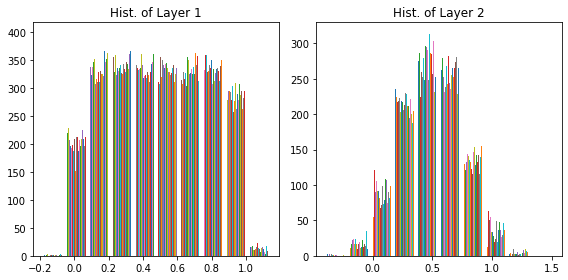

In [22]:
model_weights = [layer_with_weights.W for layer_with_weights in book_model.layers if isinstance(layer_with_weights, layer.LayerWithWeights)]

fig, axes = plt.subplots(nrows=1, ncols=len(model_weights), figsize=(8, 4))
for index, weights in enumerate(model_weights):
    print("Shape of Weights at Layer {}: {}".format(index + 1, weights.shape))
    axes[index].hist(weights)
    axes[index].set_title("Hist. of Layer {}".format(index + 1))
fig.tight_layout()

Vanishing weights seems to not be a problem in this model. Because a ReLU like activation function, Swish activation function, is applied after each affine layer with weights.

### c. Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such.  Avoid overfitting and underfitting as much as possible. We expect you to get at least 50% test accuracy with your final model.

In [23]:
def train(model, optimizer, x_train, y_train, x_val, y_val, n_epochs=10, mini_batch_size=256, print_epoch=1, print_val=150, val_every=1, shuffle_on_each_epoch=True):
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    print("Training Started!")
    for epoch in range(n_epochs):
        if shuffle_on_each_epoch:
            x_train, y_train = create_permutation(x_train, y_train)

        for iteration in range((num_data_points + mini_batch_size - 1) // mini_batch_size):
            # Get mini-batches
            x_train_ = x_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]
            y_train_ = y_train[mini_batch_size*iteration:mini_batch_size*(iteration+1)]

            # Exit the loop if mini-batch length is 0
            if len(x_train_) == 0:
                break

            softmax_out = model.forward(x_train_)

            predictions = np.argmax(softmax_out, axis=1)
            train_acc = np.mean(predictions == y_train_)
            loss = layer.loss(softmax_out, y_train_)

            train_accs.append(train_acc)
            train_losses.append(loss)

            model.backward(y_train_)
            optimizer.optimize()

            if iteration % print_val == print_val - 1:
                print("Iteration: {}, Loss: {}, Accuracy: {}".format(iteration + 1, loss, train_acc))

        if epoch % print_epoch == print_epoch - 1:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch + 1, loss, train_acc))

        if epoch % val_every == val_every - 1:
            softmax_out = model.forward(x_val)
            predictions = np.argmax(softmax_out, axis=1)
            loss = layer.loss(softmax_out, y_val)
            val_acc = np.mean(predictions == y_val)
            val_losses.append(loss)
            val_accs.append([val_acc for i in range(val_every)])
            print("Epoch: {}, Val Loss: {}, Val Accuracy: {}".format(epoch + 1, loss, val_acc))
    print("Training Ends!\n")
    return train_losses, train_accs, val_losses, val_accs

def test(model, x_test, y_test):
    print("Testing Started!\n")
    softmax_out = model.forward(x_test)
    predictions = np.argmax(softmax_out, axis=1)
    loss = layer.loss(softmax_out, y_test)
    test_acc = np.mean(predictions == y_test)
    print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))
    print("Testing Ends!\n")
    return loss, test_acc

In [24]:
def reset_models():
    various_layers=[
        [
            layer.AffineLayer(num_features, 1024),
            layer.ReLU(),
            layer.AffineLayer(1024, num_classes),
            layer.Softmax()
        ].copy(),
        [
            layer.AffineLayer(num_features, 2048),
            layer.ReLU(),
            layer.AffineLayer(2048, num_classes),
            layer.Softmax()
        ].copy(),
        [
            layer.AffineLayer(num_features, 1536),
            layer.ReLU(),
            layer.AffineLayer(1536, num_classes),
            layer.Softmax()
        ].copy(),
        [
            layer.AffineLayer(num_features, 512),
            layer.ReLU(),
            layer.AffineLayer(512, num_classes),
            layer.Softmax()
        ].copy(),
        [
            layer.AffineLayer(num_features, 1024),
            layer.ReLU(),
            layer.AffineLayer(1024, 256),
            layer.ReLU(),
            layer.AffineLayer(256, num_classes),
            layer.Softmax()
        ].copy(),
    ]

    various_models=[]
    for layer_option in various_layers:
        various_models.append(layer.Model(layer_option))
    return various_models

#### 1. Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors.

In [25]:
# Disable warnings globally, this line can be commented
np.seterr(divide='ignore', invalid='ignore')

reg_strs = np.logspace(-5, 2, num=8)
lr = 1e-1
momentum = 0.9
n_epochs = 3
mini_batch_size = 512

losses = {}

for reg_str in reg_strs:
    print("Regularization Strength: {}".format(reg_str))
    various_models = reset_models()
    model = various_models[0]
    optimizer = layer.SGDWithMomentum(model, lr=lr, regularization_str=reg_str, mu=momentum)
    train_losses, _, val_losses, _ = train(model, optimizer, x_train, y_train, x_val, y_val, n_epochs=n_epochs, mini_batch_size=mini_batch_size)
    losses[reg_str] = train_losses, val_losses
print("\nRegularization Strength Tests End!")

Regularization Strength: 1e-05
Training Started!
Iteration: 150, Loss: 3.0501290696495373, Accuracy: 0.337890625
Epoch: 1, Loss: 2.5989208518539786, Accuracy: 0.4092741935483871
Epoch: 1, Val Loss: 2.4684189670157073, Val Accuracy: 0.3983333333333333
Iteration: 150, Loss: 2.1921246119429476, Accuracy: 0.431640625
Epoch: 2, Loss: 2.130895834176395, Accuracy: 0.4536290322580645
Epoch: 2, Val Loss: 2.1466686293135924, Val Accuracy: 0.4562
Iteration: 150, Loss: 1.9719343762601969, Accuracy: 0.498046875
Epoch: 3, Loss: 1.8968162178989725, Accuracy: 0.5060483870967742
Epoch: 3, Val Loss: 2.0273919203138826, Val Accuracy: 0.47536666666666666
Training Ends!

Regularization Strength: 0.0001
Training Started!
Iteration: 150, Loss: 2.9667534075566806, Accuracy: 0.353515625
Epoch: 1, Loss: 2.456043664278163, Accuracy: 0.4032258064516129
Epoch: 1, Val Loss: 2.4220552896199576, Val Accuracy: 0.4013
Iteration: 150, Loss: 2.0385758410557973, Accuracy: 0.455078125
Epoch: 2, Loss: 1.9892397659471186, Ac

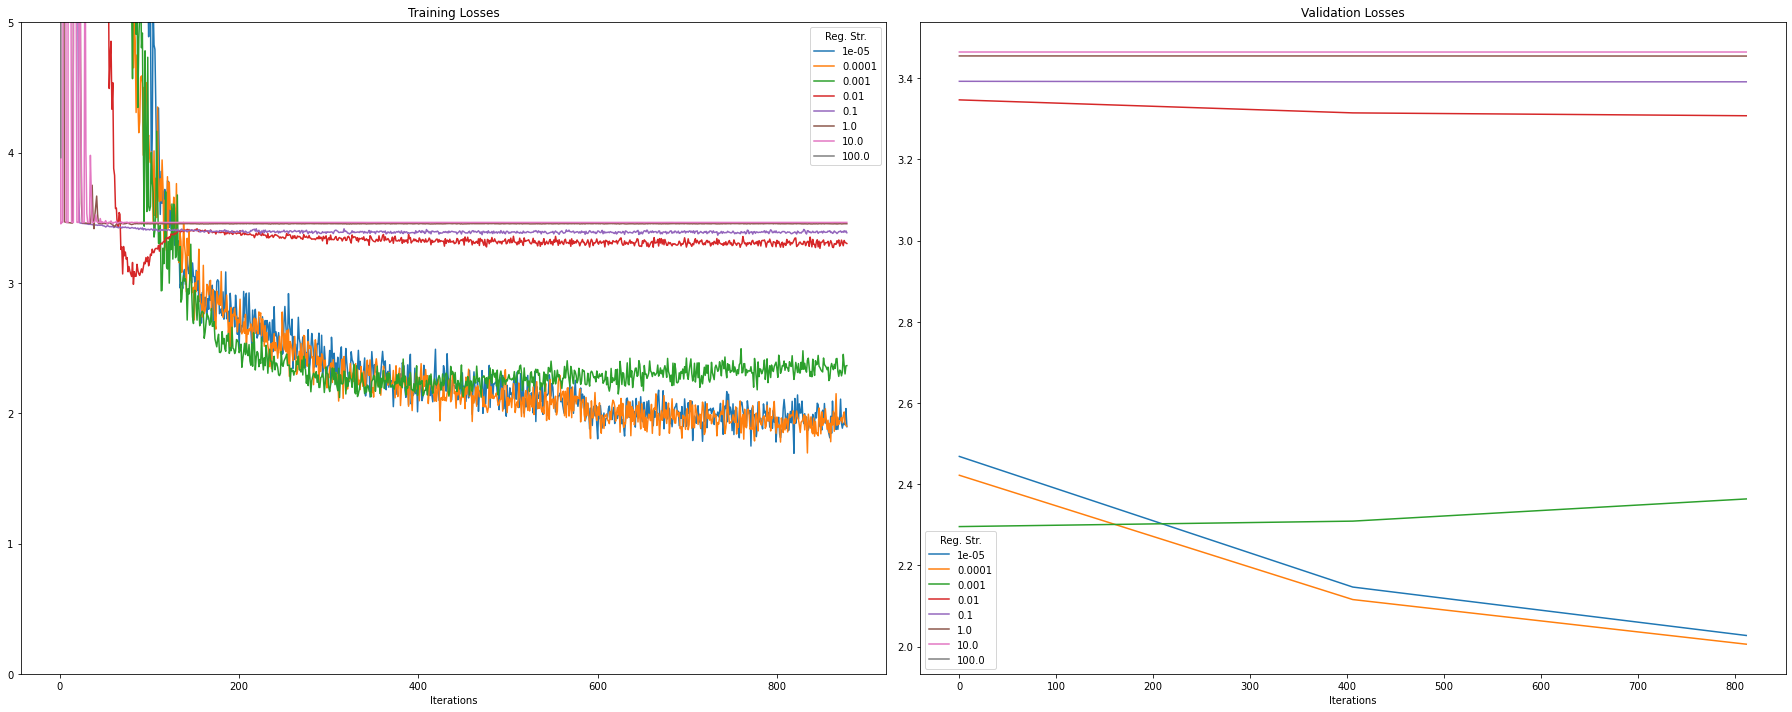

In [26]:
# Plot settings
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
n_iterations = (num_data_points + mini_batch_size - 1) // mini_batch_size

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
for index, reg_str in enumerate(reg_strs):
    axes[0].plot(losses[reg_str][0], color=colors[index])
    axes[1].plot(np.arange(0, n_iterations * n_epochs, n_iterations), losses[reg_str][1], color=colors[index])
axes[0].set_ylim(bottom=0, top=5)
axes[0].set_title("Training Losses")
axes[1].set_title("Validation Losses")
for axis in axes:
    axis.legend(reg_strs, loc="best", title="Reg. Str.")
    axis.set_xlabel("Iterations")
fig.tight_layout()

#### 2. Plot the training and validation losses as you vary the Learning Parameter alpha.

In [27]:
lrs = np.logspace(-5, 0, num=6)
reg_str = 0
momentum = 0.9
n_epochs = 3
mini_batch_size = 512

losses = {}

for lr in lrs:
    print("Learning Rate: {}".format(lr))
    various_models = reset_models()
    model = various_models[0]
    optimizer = layer.SGDWithMomentum(model, lr=lr, regularization_str=reg_str, mu=momentum)
    train_losses, _, val_losses, _ = train(model, optimizer, x_train, y_train, x_val, y_val, n_epochs=n_epochs, mini_batch_size=mini_batch_size)
    losses[lr] = train_losses, val_losses
print("\nLearning Rate Tests End!")

Learning Rate: 1e-05
Training Started!
Iteration: 150, Loss: 15.35182262128912, Accuracy: 0.048828125
Epoch: 1, Loss: 13.31523354497991, Accuracy: 0.04032258064516129
Epoch: 1, Val Loss: 13.548873769322872, Val Accuracy: 0.038566666666666666
Iteration: 150, Loss: 12.487401157523475, Accuracy: 0.037109375
Epoch: 2, Loss: 11.649965717325594, Accuracy: 0.03024193548387097
Epoch: 2, Val Loss: 11.084638809098278, Val Accuracy: 0.04356666666666666
Iteration: 150, Loss: 10.55698574786495, Accuracy: 0.044921875
Epoch: 3, Loss: 9.826500049738494, Accuracy: 0.05040322580645161
Epoch: 3, Val Loss: 9.734220138250231, Val Accuracy: 0.0471
Training Ends!

Learning Rate: 0.0001
Training Started!
Iteration: 150, Loss: 7.487403204815738, Accuracy: 0.037109375
Epoch: 1, Loss: 6.840763759805125, Accuracy: 0.04032258064516129
Epoch: 1, Val Loss: 6.509464157783887, Val Accuracy: 0.045066666666666665
Iteration: 150, Loss: 6.119768100152796, Accuracy: 0.0546875
Epoch: 2, Loss: 6.046891249530734, Accuracy: 0.

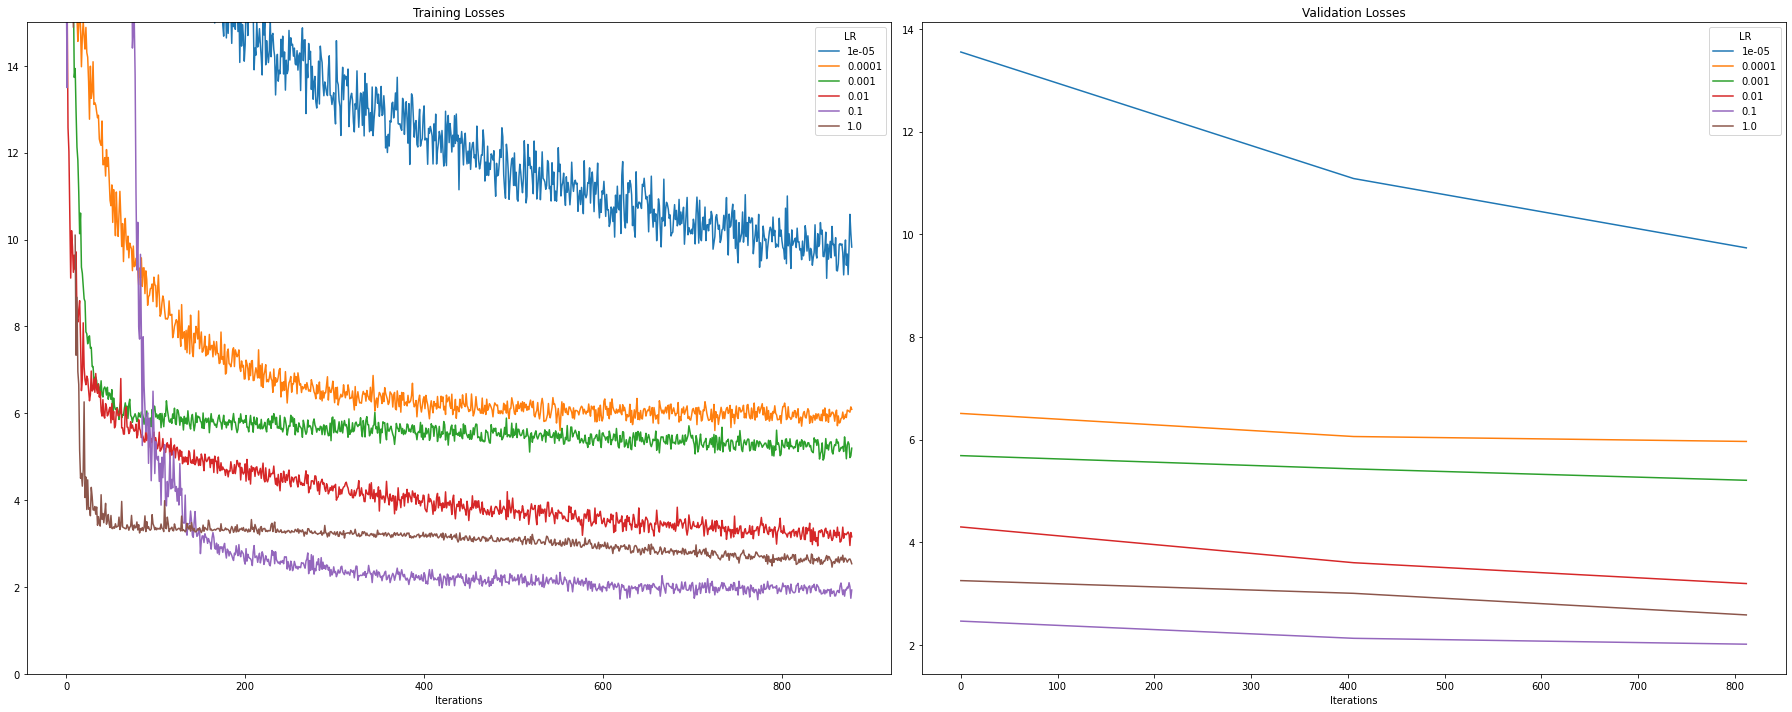

In [28]:
# Plot settings
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
n_iterations = (num_data_points + mini_batch_size - 1) // mini_batch_size

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
for index, lr in enumerate(lrs):
    axes[0].plot(losses[lr][0], color=colors[index])
    axes[1].plot(np.arange(0, n_iterations * n_epochs, n_iterations), losses[lr][1], color=colors[index])
axes[0].set_ylim(bottom=0, top=15)
axes[0].set_title("Training Losses")
axes[1].set_title("Validation Losses")
for axis in axes:
    axis.legend(lrs, loc="best", title="LR")
    axis.set_xlabel("Iterations")
fig.tight_layout()

#### 3. Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers.

In [29]:
lr = 1e-1
reg_str = 0
momentum = 0.9
n_epochs = 3
mini_batch_size = 512

optimizers = []

various_models = reset_models()
model = various_models[0]
optim_vanilla = layer.SGDWithMomentum(model, lr=lr, regularization_str=reg_str)
optimizers.append(("Vanilla SGD", model, optim_vanilla))

various_models = reset_models()
model = various_models[0]
optim_momentum = layer.SGDWithMomentum(model, lr=lr, regularization_str=reg_str, mu=momentum)
optimizers.append(("SGD w/ Momentum", model, optim_momentum))

losses = {}

for name, model, optimizer in optimizers:
    print("Optimizer: ", name)
    train_losses, _, val_losses, _ = train(model, optimizer, x_train, y_train, x_val, y_val, n_epochs=n_epochs, mini_batch_size=mini_batch_size)
    losses[name] = train_losses, val_losses
print("\nOptimizer Tests End!")

Optimizer:  Vanilla SGD
Training Started!
Iteration: 150, Loss: 9.935130545879904, Accuracy: 0.083984375
Epoch: 1, Loss: 3.952431000128312, Accuracy: 0.21370967741935484
Epoch: 1, Val Loss: 3.826763930452682, Val Accuracy: 0.22633333333333333
Iteration: 150, Loss: 3.4546776201331246, Accuracy: 0.306640625
Epoch: 2, Loss: 3.4308493207150486, Accuracy: 0.3004032258064516
Epoch: 2, Val Loss: 3.437165393623558, Val Accuracy: 0.3159666666666667
Iteration: 150, Loss: 2.826587864795603, Accuracy: 0.369140625
Epoch: 3, Loss: 2.5992707835693274, Accuracy: 0.41330645161290325
Epoch: 3, Val Loss: 2.7450060959720215, Val Accuracy: 0.3661333333333333
Training Ends!

Optimizer:  SGD w/ Momentum
Training Started!
Iteration: 150, Loss: 3.0433440046871922, Accuracy: 0.322265625
Epoch: 1, Loss: 2.5350309308181083, Accuracy: 0.38306451612903225
Epoch: 1, Val Loss: 2.4343536783200115, Val Accuracy: 0.4015666666666667
Iteration: 150, Loss: 2.1525571229547724, Accuracy: 0.4453125
Epoch: 2, Loss: 2.126036022

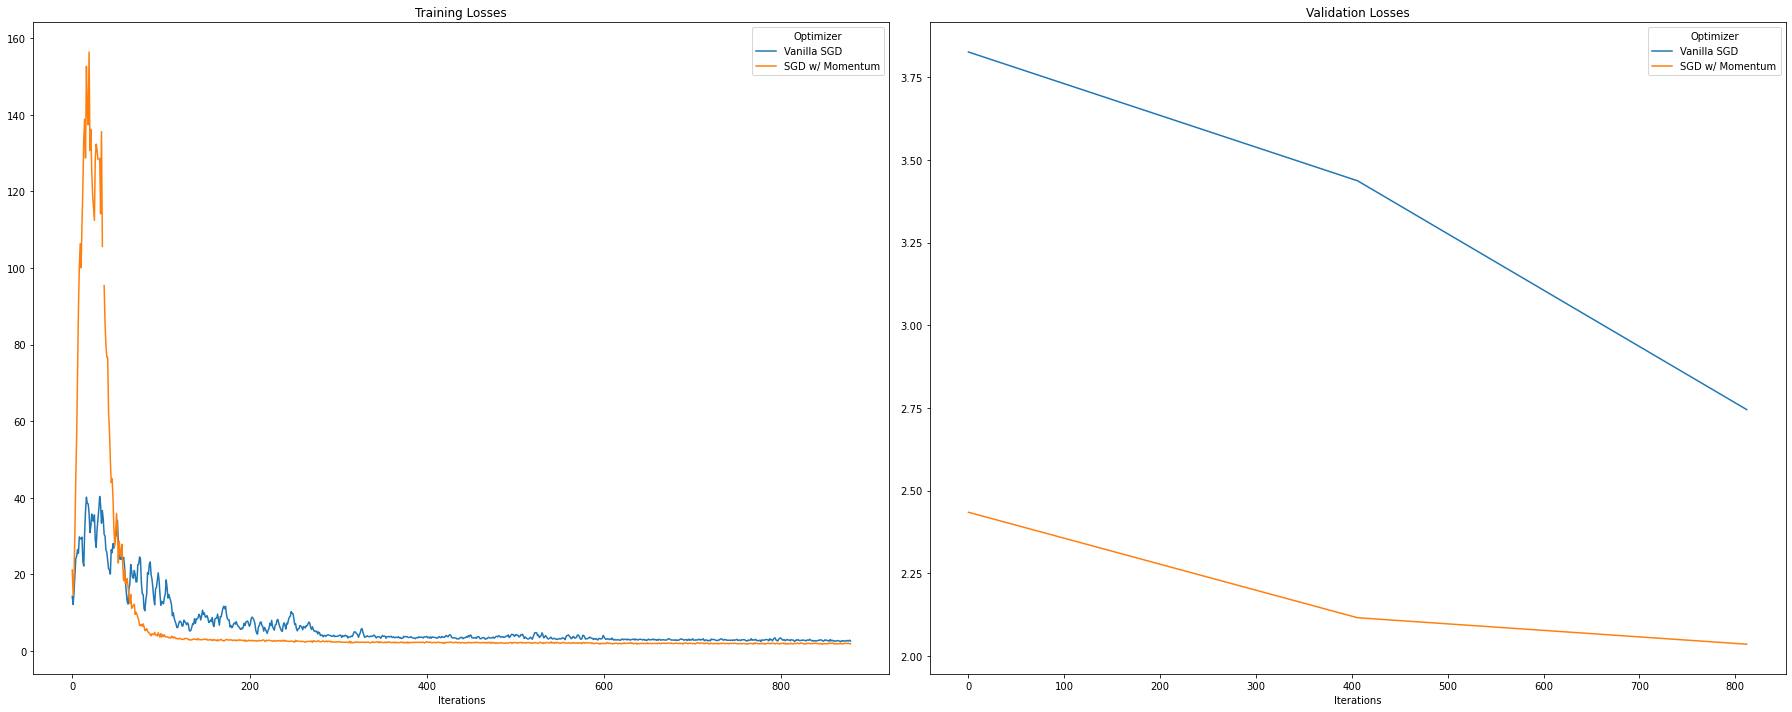

In [30]:
# Plot settings
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
n_iterations = (num_data_points + mini_batch_size - 1) // mini_batch_size

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
for index, (name, _, _) in enumerate(optimizers):
    axes[0].plot(losses[name][0], color=colors[index], label=name)
    axes[1].plot(np.arange(0, n_iterations * n_epochs, n_iterations), losses[name][1], color=colors[index], label=name)
axes[0].set_title("Training Losses")
axes[1].set_title("Validation Losses")
for axis in axes:
    axis.legend(loc="best", title="Optimizer")
    axis.set_xlabel("Iterations")
fig.tight_layout()

### d. Finally, fix your model and hyperparameters according to your observations above. Plot accuracy of your classification for training and validation sets, and print your test accuracy. Remember that the test accuracy shoud be at least 50%.

In [31]:
final_model = layer.Model()
layers = [
    layer.AffineLayer(num_features, 1024),
    layer.YourActivationActivation(),
    layer.AffineLayer(1024, num_classes),
    layer.Softmax()
]
final_model(layers)

lr = 1e-1
reg_str = 1e-4
momentum = 0.9
n_epochs = 10
mini_batch_size = 512

optimizer = layer.SGDWithMomentum(final_model, lr=lr, regularization_str=reg_str, mu=momentum)

_, train_accs, _, val_accs = train(final_model, optimizer, x_train, y_train, x_val, y_val, n_epochs=n_epochs, mini_batch_size=mini_batch_size)

Training Started!
Iteration: 150, Loss: 2.9890449604579232, Accuracy: 0.330078125
Epoch: 1, Loss: 2.279776641695853, Accuracy: 0.4153225806451613
Epoch: 1, Val Loss: 2.3813508429984864, Val Accuracy: 0.40973333333333334
Iteration: 150, Loss: 1.9955499954206775, Accuracy: 0.458984375
Epoch: 2, Loss: 2.0822127663350845, Accuracy: 0.4536290322580645
Epoch: 2, Val Loss: 2.0820853261607897, Val Accuracy: 0.45786666666666664
Iteration: 150, Loss: 1.8555967584471262, Accuracy: 0.515625
Epoch: 3, Loss: 1.9511848866322132, Accuracy: 0.49798387096774194
Epoch: 3, Val Loss: 1.9911331175686515, Val Accuracy: 0.4730666666666667
Iteration: 150, Loss: 1.7776089956808625, Accuracy: 0.541015625
Epoch: 4, Loss: 1.8299782751618916, Accuracy: 0.5262096774193549
Epoch: 4, Val Loss: 1.92995699845492, Val Accuracy: 0.4885
Iteration: 150, Loss: 1.7651921160950284, Accuracy: 0.517578125
Epoch: 5, Loss: 1.868274674121811, Accuracy: 0.5040322580645161
Epoch: 5, Val Loss: 1.8736684027008261, Val Accuracy: 0.4984


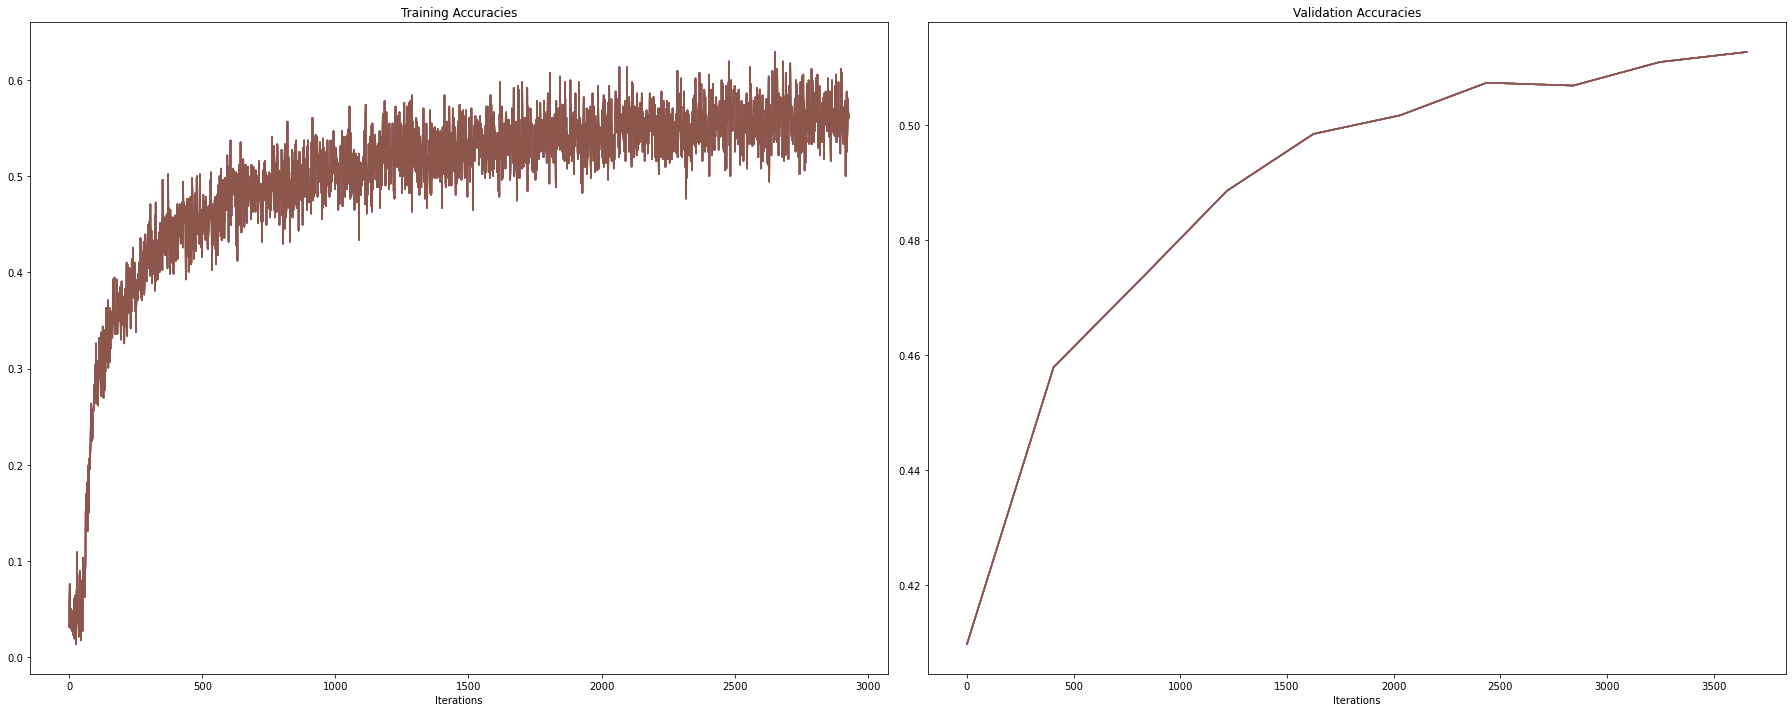

In [32]:
# Plot settings
n_iterations = (num_data_points + mini_batch_size - 1) // mini_batch_size

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
for index, lr in enumerate(lrs):
    axes[0].plot(train_accs)
    axes[1].plot(np.arange(0, n_iterations * n_epochs, n_iterations), val_accs)
axes[0].set_title("Training Accuracies")
axes[1].set_title("Validation Accuracies")
for axis in axes:
    axis.set_xlabel("Iterations")
fig.tight_layout()

In [33]:
_, test_acc = test(final_model, x_test, y_test)
print("Test Accucary: {:07.4f}%".format(test_acc * 100))

Testing Started!

Test Loss: 1.8136832888104355, Test Accuracy: 0.5085231394167996
Testing Ends!

Test Accucary: 50.8523%
